In [21]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress all warnings
warnings.filterwarnings("ignore")

In [3]:
# Reading all the csv files into dfs
address = pd.read_csv('address_details.csv', dtype={'OFFENDER NC DOC ID NUMBER': str})
county = pd.read_csv('county_details.csv', dtype={'OFFENDER NC DOC ID NUMBER': str})
info = pd.read_csv('incar_info.csv', dtype={'INMATE DOC NUMBER': str})
sen = pd.read_csv('sentence_and_release_details.csv', dtype={'INMATE DOC NUMBER': str})

# Just keeping those rows which have common DOC ID in all dfs
id1 = set(address["OFFENDER NC DOC ID NUMBER"])
id2 = set(county["OFFENDER NC DOC ID NUMBER"])
id3 = set(info["INMATE DOC NUMBER"])
id4 = set(sen["INMATE DOC NUMBER"])

common_ids = id1.intersection(id2, id3, id4)

common_ids_list = list(common_ids)

common_ids_series = pd.Series(common_ids_list)
address = address[address['OFFENDER NC DOC ID NUMBER'].isin(common_ids_list)]
county = county[county['OFFENDER NC DOC ID NUMBER'].isin(common_ids_list)]
info = info[info['INMATE DOC NUMBER'].isin(common_ids_list)]
sen = sen[sen['INMATE DOC NUMBER'].isin(common_ids_list)]

# changing the name of DOC ID columns
county.rename(columns={'OFFENDER NC DOC ID NUMBER': 'INMATE DOC NUMBER'}, inplace=True)
address.rename(columns={'OFFENDER NC DOC ID NUMBER': 'INMATE DOC NUMBER'}, inplace=True)

## Admissions per Year

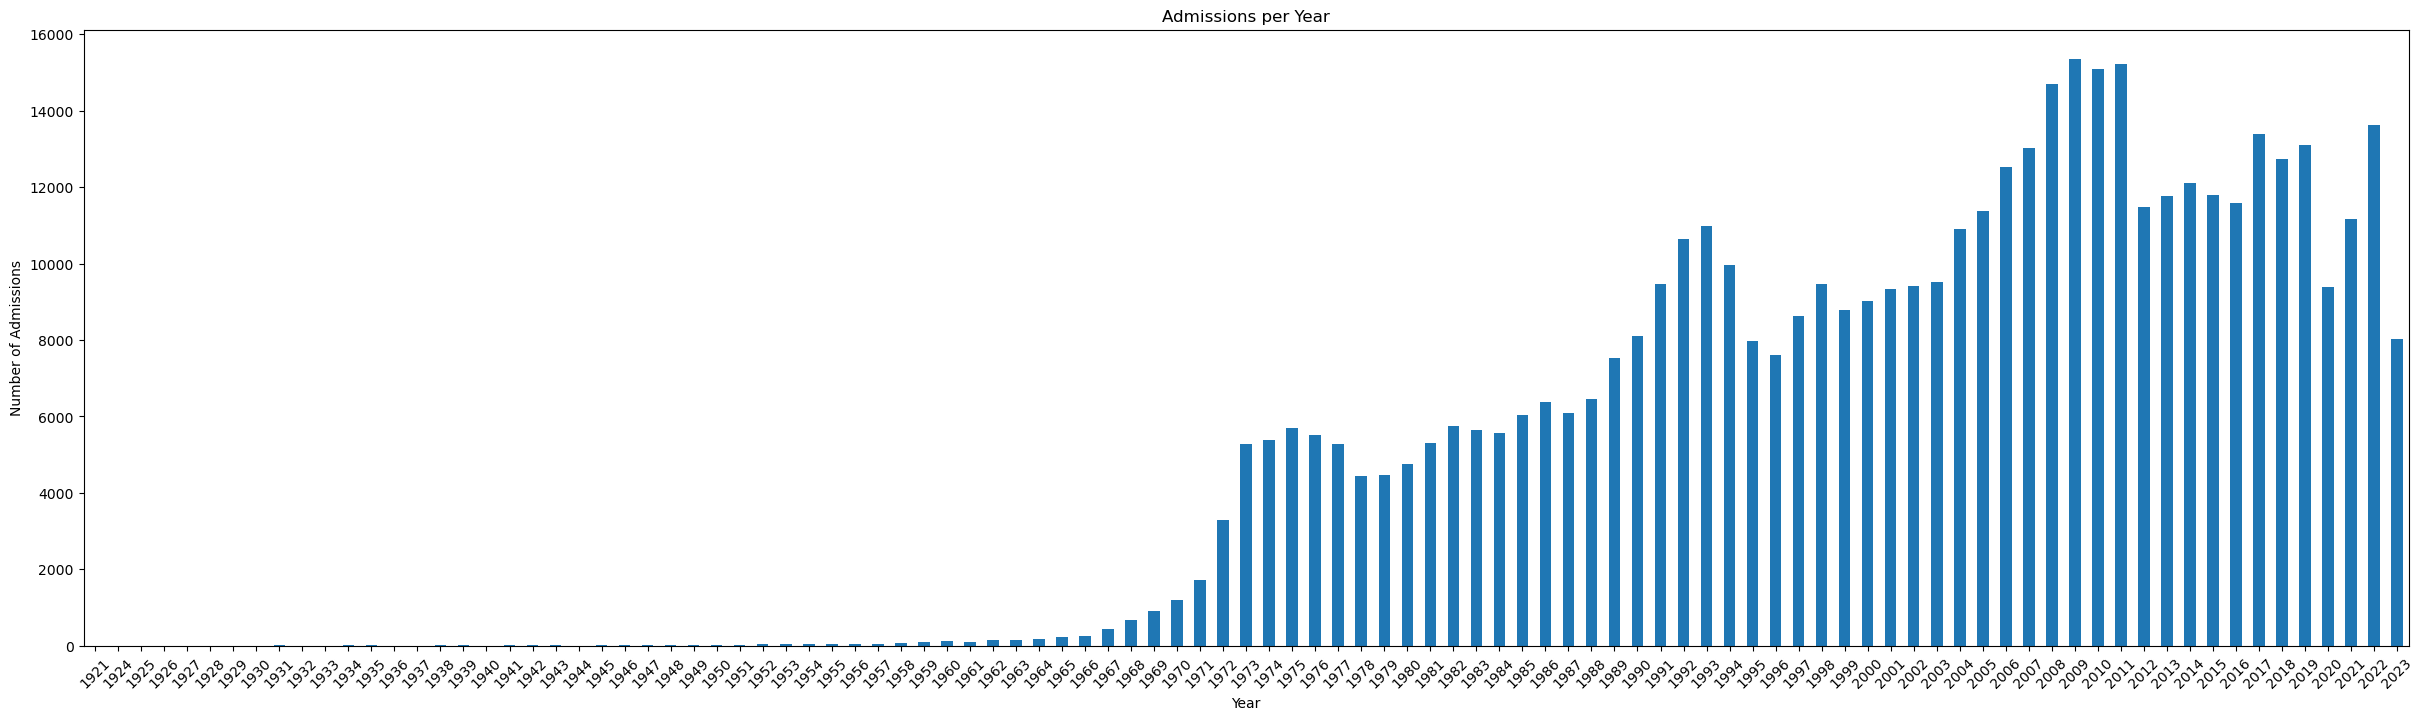

In [6]:
info['INMATE ADMISSION DATE'] = pd.to_datetime(info['INMATE ADMISSION DATE'])

info['Year'] = info['INMATE ADMISSION DATE'].dt.year

# Count admissions per year
admissions_per_year = info['Year'].value_counts().sort_index()

# Plot the bar graph
admissions_per_year.plot(kind='bar', figsize=(30, 8))
plt.xlabel('Year')
plt.ylabel('Number of Admissions')
plt.title('Admissions per Year')
plt.xticks(rotation=45)
plt.show()

## Top 10 countries where Incarcerated People were born

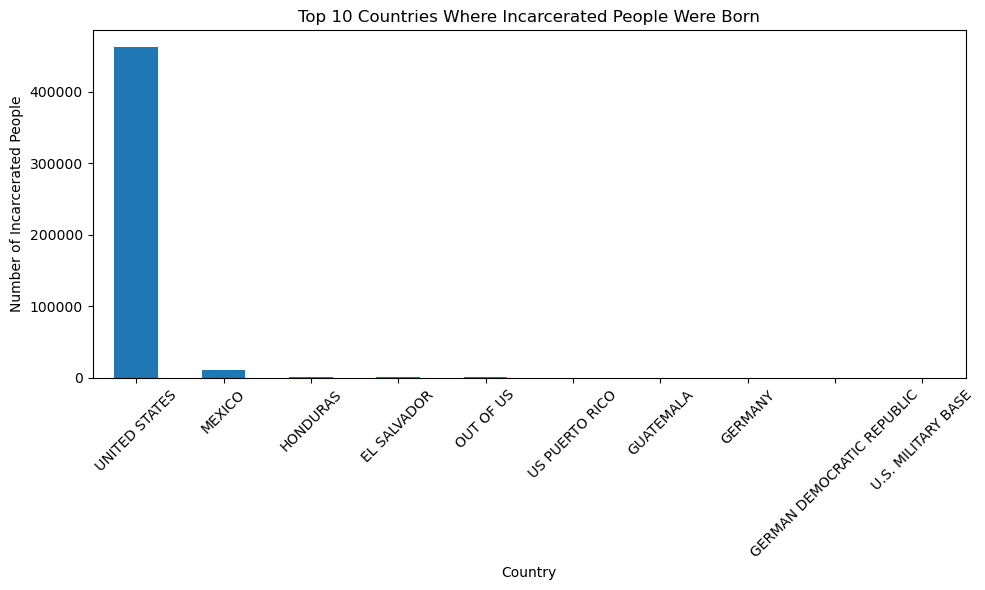

In [75]:
import matplotlib.pyplot as plt

country_counts = filtered_address["COUNTRY WHERE OFFENDER BORN"].value_counts()

# Select top 10 countries
top_countries = country_counts.head(10)

# Create a histogram
plt.figure(figsize=(10, 6))
top_countries.plot(kind="bar")
plt.title("Top 10 Countries Where Incarcerated People Were Born")
plt.xlabel("Country")
plt.ylabel("Number of Incarcerated People")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Top 10 States where Incarcerated People were born

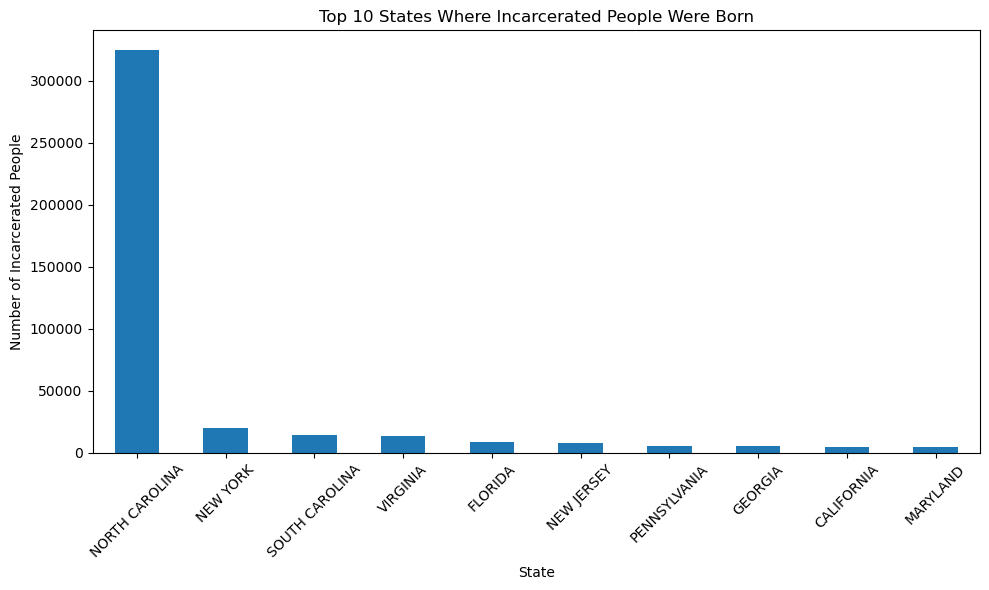

In [77]:
state_counts = filtered_address["STATE WHERE OFFENDER BORN"].value_counts()

# Select top 10 countries
top_states = state_counts.head(10)

# Create a histogram
plt.figure(figsize=(10, 6))
top_states.plot(kind="bar")
plt.title("Top 10 States Where Incarcerated People Were Born")
plt.xlabel("State")
plt.ylabel("Number of Incarcerated People")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Incarcerated US Citizen vs Non-US Citizens

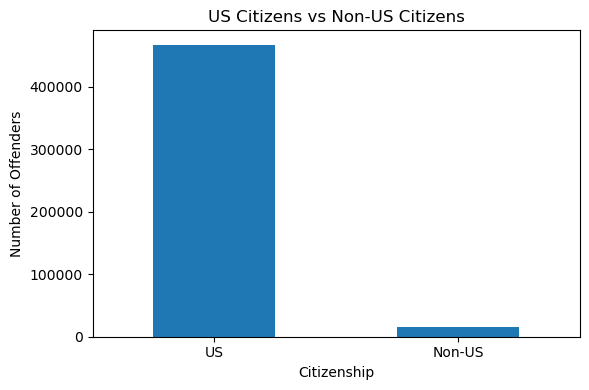

In [79]:
# Map citizenship codes to US or non-US
citizenship_mapping = {
    'BORN IN U.S.': 'US',
    'ALIEN': 'Non-US',
    'UNKNOWN': 'Non-US',
    'NATURALIZED': 'US',
    'DUAL W/US': 'US',
}

filtered_address['Citizenship'] = filtered_address['OFFENDER CITIZENSHIP CODE'].map(citizenship_mapping)

# Count the occurrences of each citizenship type
citizenship_counts = filtered_address['Citizenship'].value_counts()

# Create a bar graph
plt.figure(figsize=(6, 4))
citizenship_counts.plot(kind='bar')
plt.title("US Citizens vs Non-US Citizens")
plt.xlabel("Citizenship")
plt.ylabel("Number of Offenders")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Breakdown of Offenses by Gender

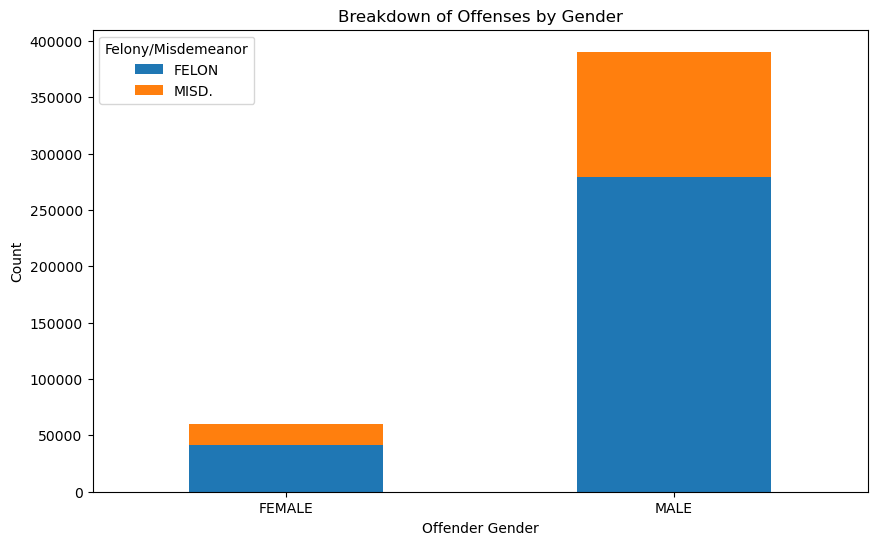

In [11]:
grouped_data = info.groupby(['INMATE GENDER CODE', 'INMATE IS FELON/MISDEMEANANT']).size().unstack()

# Plotting stacked bar plot
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Offender Gender')
plt.ylabel('Count')
plt.title('Breakdown of Offenses by Gender')
plt.legend(title='Felony/Misdemeanor')
plt.xticks(rotation=0) 

plt.show()


## Distribution of Total Discipline Infractions by Gender or Race

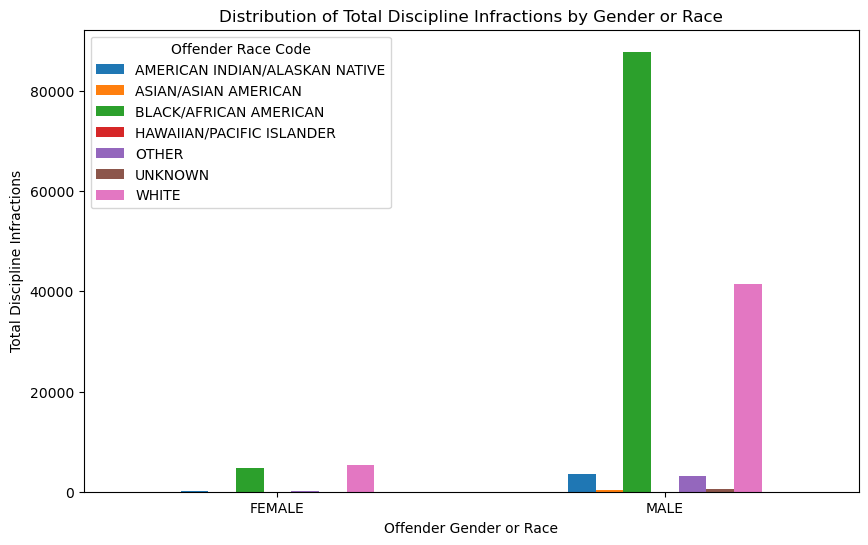

In [17]:
info['TOTAL DISCIPLINE INFRACTIONS'] = info['TOTAL DISCIPLINE INFRACTIONS'].replace(['-', pd.NA], '0')
info['TOTAL DISCIPLINE INFRACTIONS'] = info['TOTAL DISCIPLINE INFRACTIONS'].astype(int)
grouped_data = info.groupby(['INMATE GENDER CODE', 'INMATE RACE CODE'])['TOTAL DISCIPLINE INFRACTIONS'].sum().unstack()

# Plotting bar plot
ax = grouped_data.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Offender Gender or Race')
plt.ylabel('Total Discipline Infractions')
plt.title('Distribution of Total Discipline Infractions by Gender or Race')
plt.legend(title='Offender Race Code')
plt.xticks(rotation=0) 

plt.show()

## Percentage Distribution of Total Discipline Infractions by Gender and Race

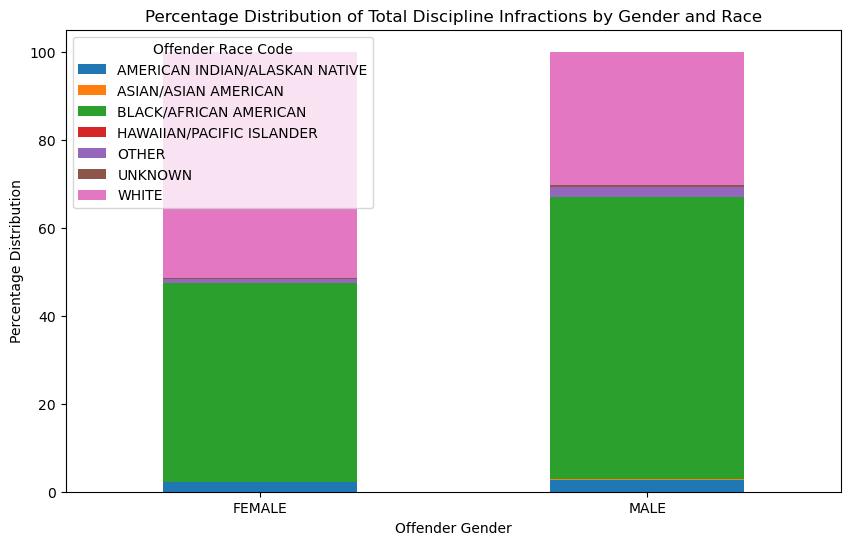

In [18]:
grouped_data = info.groupby(['INMATE GENDER CODE', 'INMATE RACE CODE'])['TOTAL DISCIPLINE INFRACTIONS'].sum().unstack()

total_infractions_by_group = grouped_data.sum(axis=1)

percentage_distribution = grouped_data.divide(total_infractions_by_group, axis=0) * 100

ax = percentage_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Offender Gender')
plt.ylabel('Percentage Distribution')
plt.title('Percentage Distribution of Total Discipline Infractions by Gender and Race')
plt.legend(title='Offender Race Code')
plt.xticks(rotation=0) 

plt.show()

## Number of Discipline Infractions Across Different Custody Classes

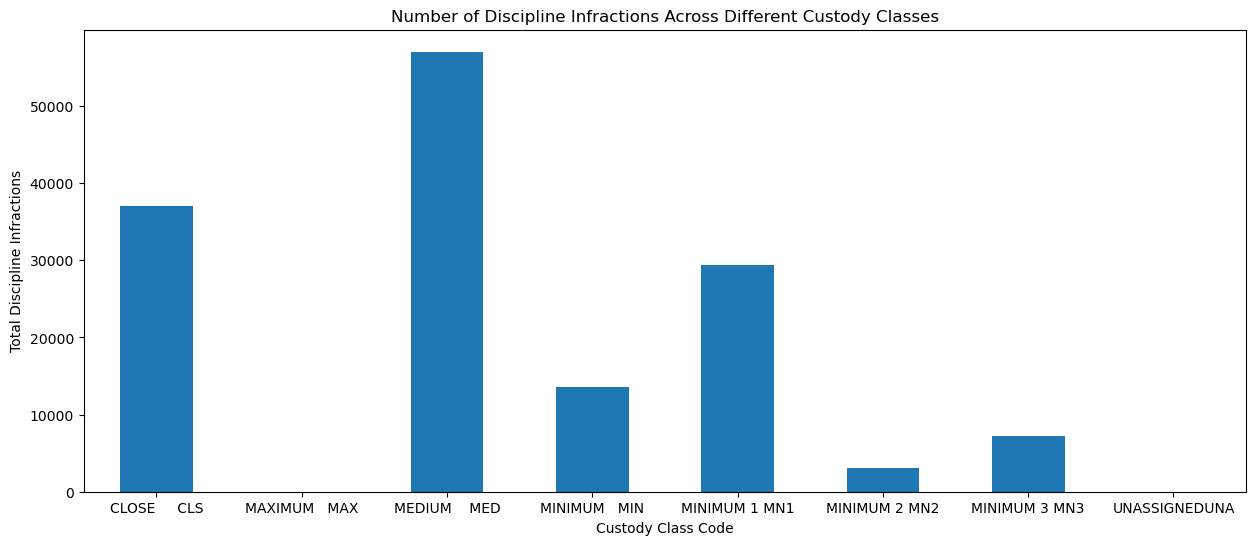

In [20]:
grouped_data = info.groupby('CUSTODY CLASS CODE')['TOTAL DISCIPLINE INFRACTIONS'].sum()

# Plotting grouped bar plot
ax = grouped_data.plot(kind='bar', figsize=(15, 6))
plt.xlabel('Custody Class Code')
plt.ylabel('Total Discipline Infractions')
plt.title('Number of Discipline Infractions Across Different Custody Classes')
plt.xticks(rotation=0) 

plt.show()

## Box Plot of Length of Current Incarceration by Gender

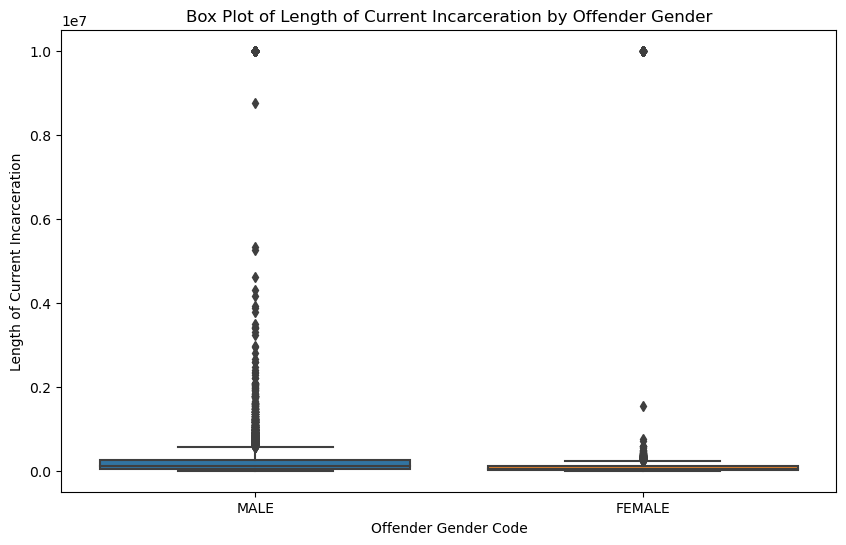

In [25]:
# Create a box plot using Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(data=info, x='INMATE GENDER CODE', y='LENGTH OF CURRENT INCARCERATN.')
plt.xlabel('Offender Gender Code')
plt.ylabel('Length of Current Incarceration')
plt.title('Box Plot of Length of Current Incarceration by Offender Gender')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed

plt.show()

In [26]:
# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Plot distribution of maximum sentence
sns.histplot(data=county, x='MINIMUM SENTENCE LENGTH', kde=True, ax=axes[0])
axes[0].set_xlabel('Maximum Sentence')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Maximum Sentence')

# Plot distribution of minimum sentence
sns.histplot(data=county, x='MAXIMUM SENTENCE LENGTH', kde=True, ax=axes[1])
axes[1].set_xlabel('Minimum Sentence')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Minimum Sentence')

# Plot distribution of actual time served
sns.histplot(data=info, x='TERM OF INCARCERATION(IN DAYS)', kde=True, ax=axes[2])
axes[2].set_xlabel('Actual Time Served')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Distribution of Actual Time Served')

# Adjust layout
plt.tight_layout()
plt.show()

KeyboardInterrupt: 